In [54]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(14,12)})
import matplotlib.pyplot as plt
import numpy as np

In [75]:
game_events = pd.read_csv("D:\\new_downloads\SMT-Data-Challenge\SMT-Data-Challenge\\game_events.csv")

position_mapping = {
    1:'pitcher',
    2:'catcher',
    3:'first_baseman',
    4:'second_baseman',
    5:'third_baseman',
    6:'shortstop',
    7:'left_field',
    8:'center_field',
    9:'right_field',
    10:'batter',
    11:'first_baserunner',
    12:'second_baserunner',
    13:'third_baserunner'
}
event_mapping = {
    1:	"pitch",
    2:	"ball acquired",
    3:	"throw (ball-in-play)",
    4:	"ball hit into play",
    5:	"end of play",
    6:	"pickoff throw",
    7:	"ball acquired",
    8:	"throw (ball-in-play)",
    9:	"ball deflection",
    10:	"ball deflection off of wall",
    11:	"home run",
    16:	"ball bounce",
}
game_events['player_position'] = game_events['player_position'].map(position_mapping);
game_events['event_code'] = game_events['event_code'].map(event_mapping);
game_events

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
0,1900_01_TeamKJ_TeamB,1,NaN,1,20549,pitcher,pitch
1,1900_01_TeamKJ_TeamB,1,NaN,1,21044,catcher,ball acquired
2,1900_01_TeamKJ_TeamB,1,NaN,1,21044,NaN,end of play
3,1900_01_TeamKJ_TeamB,2,NaN,2,31738,pitcher,pitch
4,1900_01_TeamKJ_TeamB,2,NaN,2,32233,catcher,ball acquired
...,...,...,...,...,...,...,...
103439,1903_32_TeamNB_TeamA1,165,54.0,169,5398327,NaN,end of play
103440,1903_32_TeamNB_TeamA1,166,55.0,170,5433577,pitcher,pitch
103441,1903_32_TeamNB_TeamA1,166,55.0,170,5434027,batter,ball hit into play
103442,1903_32_TeamNB_TeamA1,166,55.0,170,5439177,center_field,ball acquired


In [76]:
game_events[game_events['play_id']==8]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
23,1900_01_TeamKJ_TeamB,8,NaN,8,156662,pitcher,pitch
24,1900_01_TeamKJ_TeamB,8,NaN,8,157158,catcher,ball acquired
25,1900_01_TeamKJ_TeamB,8,NaN,8,157158,NaN,end of play
962,1900_02_TeamKJ_TeamB,8,NaN,8,290060,pitcher,pitch
963,1900_02_TeamKJ_TeamB,8,NaN,8,290489,batter,ball hit into play
...,...,...,...,...,...,...,...
101683,1903_31_TeamNB_TeamA1,8,4.0,8,259542,catcher,ball acquired
101684,1903_31_TeamNB_TeamA1,8,4.0,8,259542,NaN,end of play
102798,1903_32_TeamNB_TeamA1,8,5.0,8,266188,pitcher,pitch
102799,1903_32_TeamNB_TeamA1,8,5.0,8,266588,batter,ball hit into play


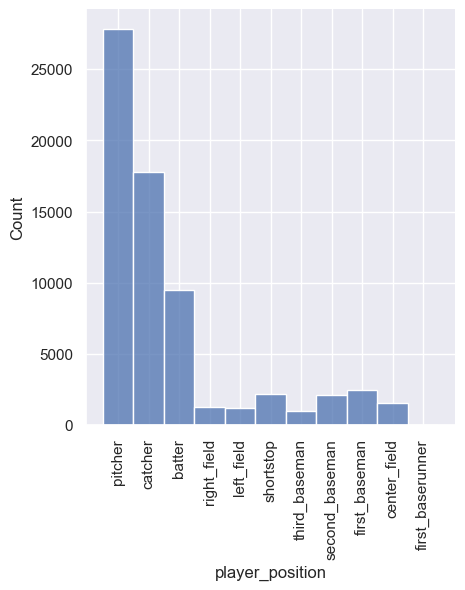

In [35]:
ax = sns.displot(game_events, x="player_position")
ax.set_xticklabels(rotation=90)

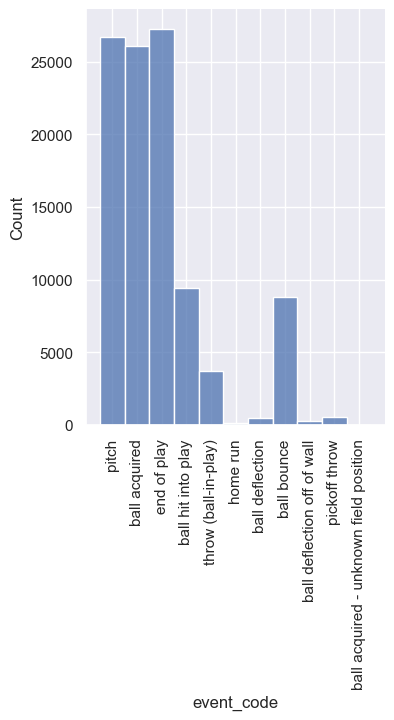

In [36]:
ax = sns.displot(game_events, x="event_code")
ax.set_xticklabels(rotation=90)

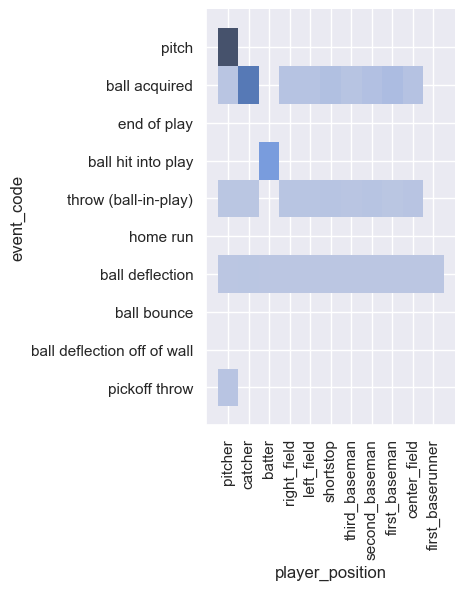

In [65]:
ax = sns.displot(game_events, x="player_position", y="event_code")
ax.set_xticklabels(rotation=90)

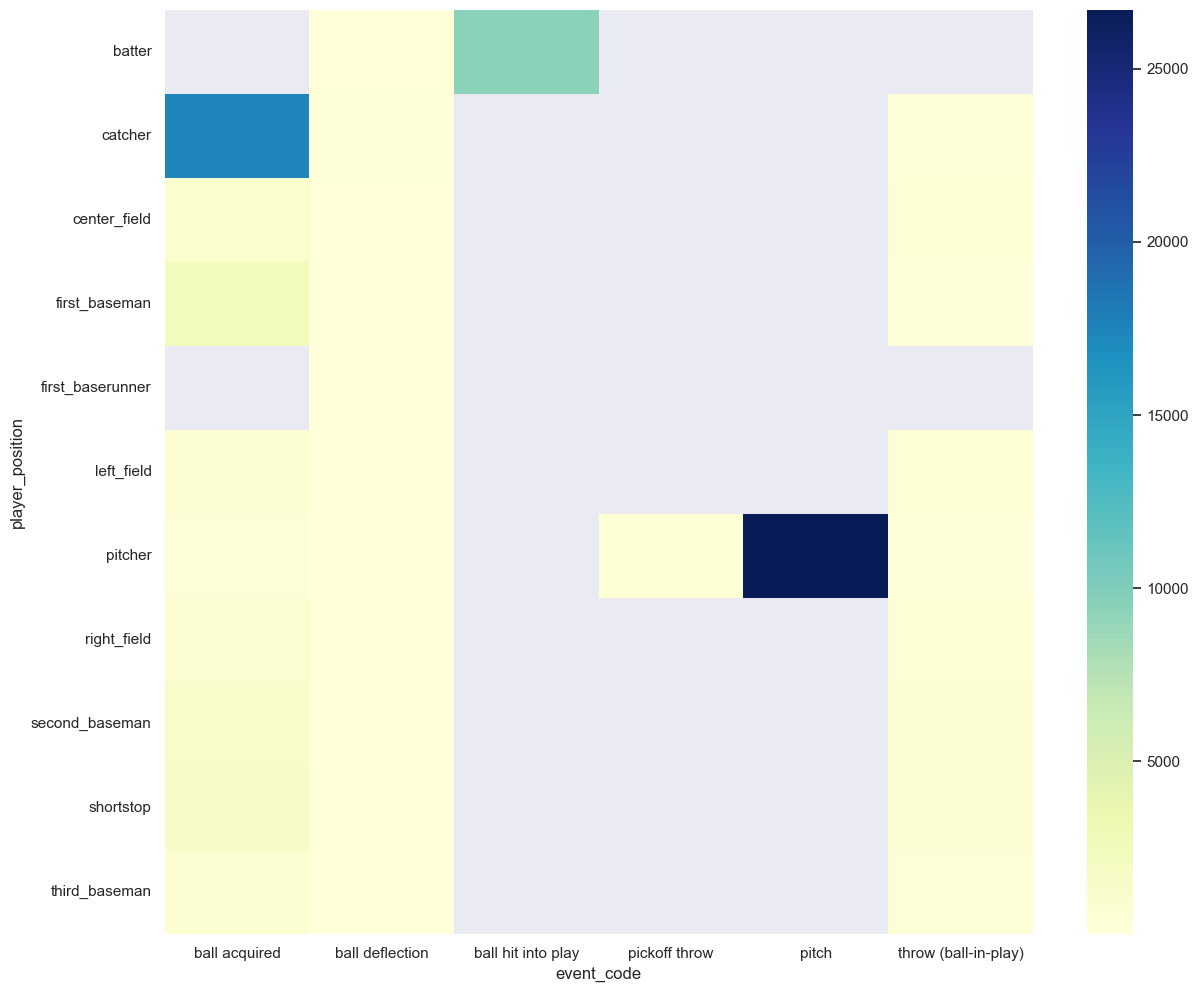

In [64]:
table = game_events.groupby(['player_position','event_code']).size()
table_df = table.to_frame()
table_df.reset_index(inplace=True)
table_df.rename(columns = {0:'count'}, inplace = True)
table_df = table_df.pivot(index='player_position',columns=['event_code'],values='count')
ax = sns.heatmap(table_df,cmap="YlGnBu")